# Import Libraries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from os import listdir
np.set_printoptions(suppress=True)

# Trực quan hóa dữ liệu của các ngày

Nhập dữ liệu từ ngày 26/2/2023 đến nay

In [117]:
files = [f for f in listdir('./data/')]

df_dict = {}

for file in files:
    url = './data/' + file
    df_dict[file[:-4]] = pd.read_csv(url)

### Trực quan hóa dữ liệu từ ngày 26/2/2023 đến nay

Dịch covid-19 đã được đẩy lùi ở một số quốc gia nhưng vẫn đang lây lan ở các quốc gia khác. Phần này sẽ có một số phân tích chuyên sâu về tình hình hiện tại của đại dịch Covid 19 ở top 10 quốc gia có nhiều ca bệnh nhất.

In [118]:
country_list = list(df_dict.values())[0].sort_values(by=['TotalCases'], ascending=False).iloc[:11]['Country,Other'].to_list()
country_list.remove('World')
country_list

['USA',
 'India',
 'France',
 'Germany',
 'Brazil',
 'Japan',
 'S. Korea',
 'Italy',
 'UK',
 'Russia']

**Các ca tử vong mới, các ca nhiễm mới và các ca hồi phục mới những ngày gần đây như thế nào ở các quốc gia?**\
Bằng cách xem xét các ca tử vong mới, các ca nhiễm mới và các ca hồi phục mới, chúng ta có thể thấy tình hình đại dịch ở các quốc gia trong những ngày gần đây.

In [119]:
date_list = []
new_death = []
new_cases = []
new_recovered = []
for key, item in df_dict.items():
    date_list.append(key)
    temp = item.set_index('Country,Other')
    new_death.append(temp['NewDeaths'][country_list].to_list())
    new_cases.append(temp['NewCases'][country_list].to_list())
    new_recovered.append(temp['NewRecovered'][country_list].to_list())

new_death_df = pd.DataFrame(new_death, columns=country_list, index=date_list)
new_cases_df = pd.DataFrame(new_cases, columns=country_list, index=date_list)
new_recovered_df = pd.DataFrame(new_recovered, columns=country_list, index=date_list)

new_death_df.index = pd.to_datetime(new_death_df.index, format='%d-%m-%Y')
new_cases_df.index = pd.to_datetime(new_cases_df.index, format='%d-%m-%Y')
new_recovered_df.index = pd.to_datetime(new_recovered_df.index, format='%d-%m-%Y')

new_death_df = new_death_df.sort_index()
new_cases_df = new_cases_df.sort_index()
new_recovered_df = new_recovered_df.sort_index()

<AxesSubplot:title={'center':'New Recovered'}>

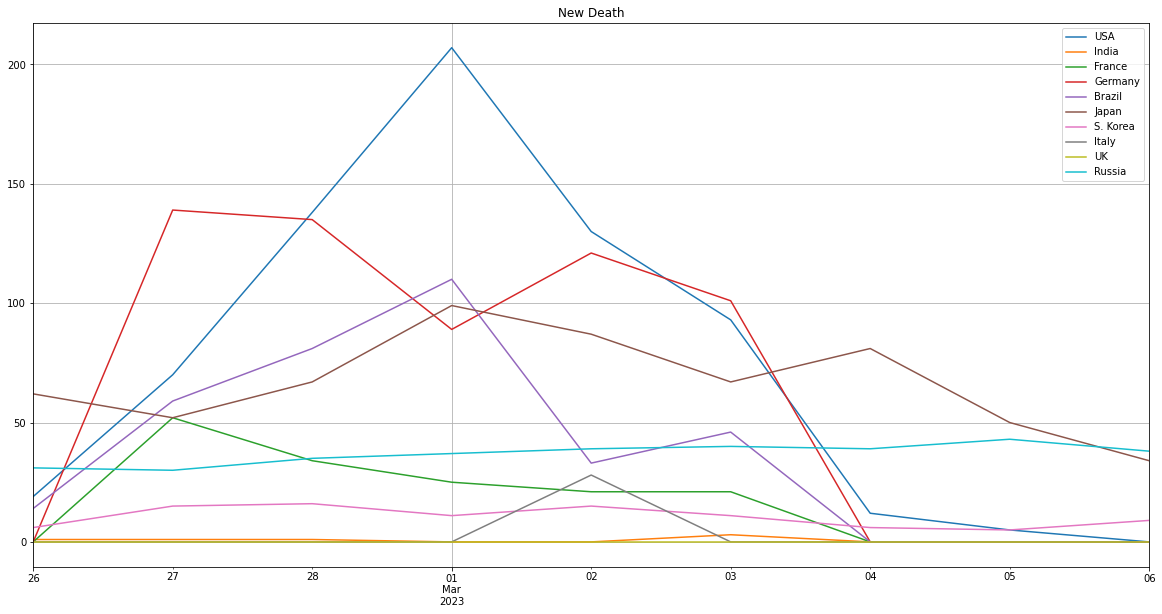

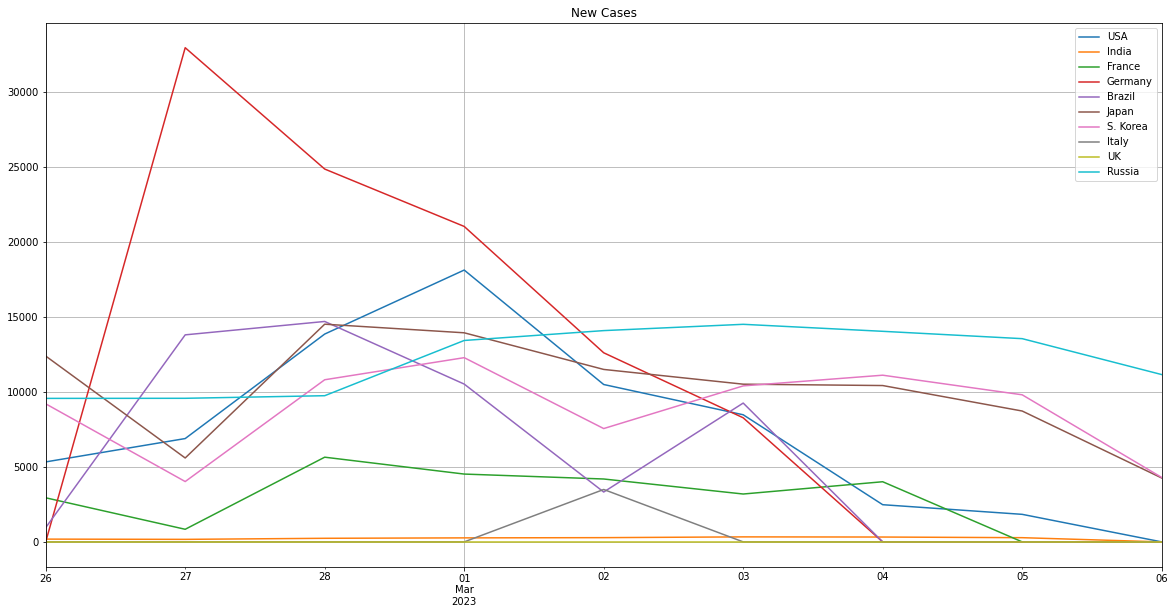

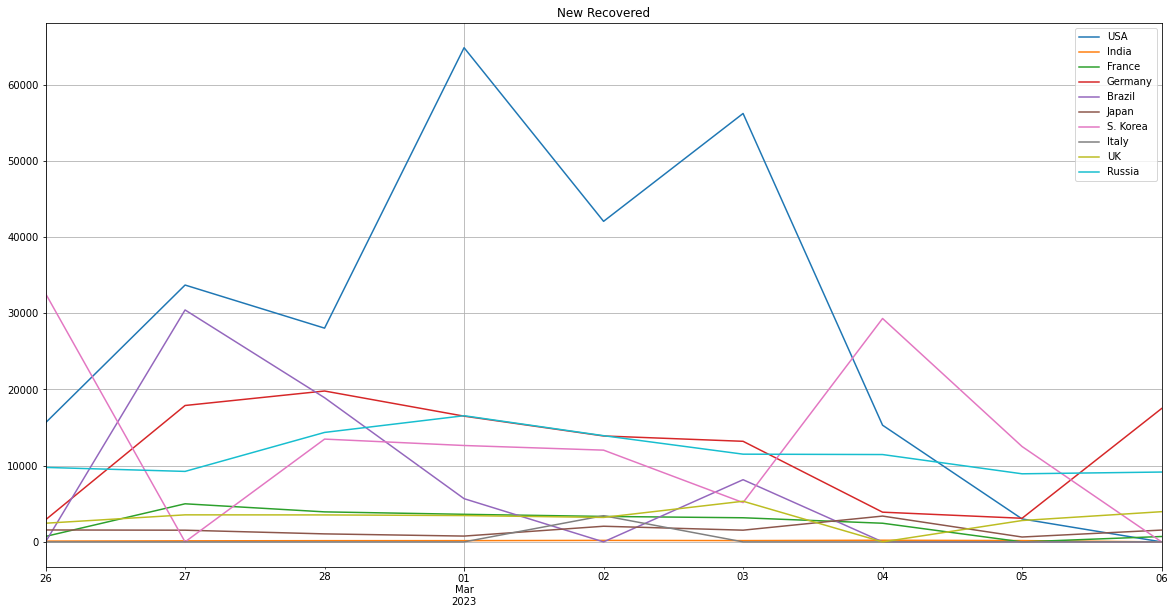

In [120]:
new_death_df.plot(figsize=(20,10), title='New Death', grid=True)
new_cases_df.plot(figsize=(20,10), title='New Cases', grid=True)
new_recovered_df.plot(figsize=(20,10), title='New Recovered', grid=True)

* Từ biểu đồ, có thể thấy đại dịch vẫn đang lan rộng trên thế giới, nhưng đã có một số tín hiệu đáng mừng. Các ca mắc mới và tử vong mới đang giảm và duy trì ở mức thấp, trong khi các ca phục hồi mới đang gia tăng và ổn định ở các quốc gia có nhiều ca nhiễm nhất.
* Trong khi đó, tại Mỹ, Đức và Nga, những ngày qua số ca mắc mới và tử vong có sự gia tăng đáng kể.
* Mỹ cho thấy họ có Hệ thống chăm sóc y tế tốt vì số ca mắc mới khỏi bệnh luôn cao hơn số ca mắc mới và số ca tử vong.

### Trực quan hóa dữ liệu ngày 6/3/2023

**Tỉ lệ số người chết và số người bình phục so với tổng số ca như thế nào?**\
Trả lời câu hỏi này sẽ giúp chúng ta phần nào hiểu được tình hình đại dịch ở các quốc gia, nếu tỉ lệ người chết cao và tỉ lệ bình phục thấp thì có nghĩa là kế hoạch chống dịch của quốc gia đó không tốt, và ngược lại.

In [121]:
country_list = list(df_dict.values())[0]['Country,Other'].to_list()
country_list.remove('World')

In [122]:
#find the total cases for each country in the world in the latest date (6/3/2023)
total_cases = []
total_death = []
total_recovered = []
for country in country_list:
    total_cases.append(df_dict['06-03-2023'].set_index('Country,Other')['TotalCases'][country])
    total_death.append(df_dict['06-03-2023'].set_index('Country,Other')['TotalDeaths'][country])
    total_recovered.append(df_dict['06-03-2023'].set_index('Country,Other')['TotalRecovered'][country])

total_cases_df = pd.DataFrame(total_cases, index=country_list, columns=['total_cases'])
total_death_df = pd.DataFrame(total_death, index=country_list, columns=['total_deaths'])
total_recovered_df = pd.DataFrame(total_recovered, index=country_list, columns=['total_recovered'])

total_death_df = total_death_df.sort_index()
total_cases_df = total_cases_df.sort_index()
total_recovered_df = total_recovered_df.sort_index()

df = pd.concat([total_cases_df, total_death_df, total_recovered_df], axis=1)
df

,total_cases,total_deaths,total_recovered
Afghanistan,209406,7896.00,191250.00
Albania,334427,3597.00,329169.00
Algeria,271477,6881.00,182803.00
Andorra,47875,165.00,47563.00
Angola,105277,1933.00,103317.00
...,...,...,...
Wallis and Futuna,3427,7.00,438.00
Western Sahara,10,1.00,9.00
Yemen,11945,2159.00,9124.00
Zambia,343135,4057.00,338854.00


In [123]:
percent_dict = {}
for country in country_list:
    percent_dict[country] = [round(df['total_deaths'][country]/df['total_cases'][country]*100, 2), round(df['total_recovered'][country]/df['total_cases'][country]*100, 2)]
percent_df = pd.DataFrame(percent_dict, index=['death_percentage', 'recovered_percentage']).T
pd.options.display.float_format = '{:.2f}'.format
percent_df

,death_percentage,recovered_percentage
USA,1.09,97.60
India,1.19,98.81
France,0.42,99.40
Germany,0.44,98.84
Brazil,1.89,97.77
...,...,...
Diamond Princess,1.83,98.17
Vatican City,0.00,100.00
Western Sahara,10.00,90.00
MS Zaandam,22.22,77.78


In [124]:
#sort the dataframe by the death percentage
death_percent_df = percent_df.sort_values(by=['death_percentage'], ascending=False)
recovered_percent_df = percent_df.sort_values(by=['recovered_percentage'], ascending=False)
death_percent_df = death_percent_df.head(10)
recovered_percent_df = recovered_percent_df.head(10)

<AxesSubplot:title={'center':'Death Percentage'}>

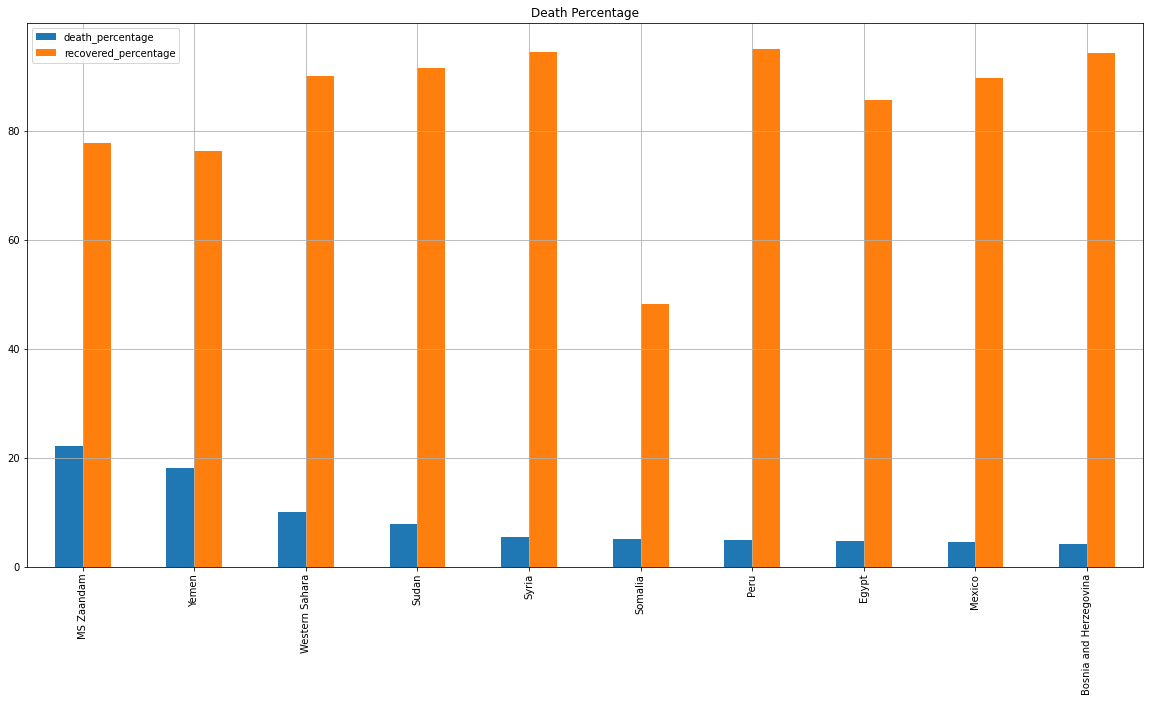

In [125]:
#visualize the data in a bar chart
death_percent_df.plot(kind='bar', figsize=(20,10), title='Death Percentage', grid=True)

Từ biểu đồ ta có thể thấy tỉ lệ người tử vong ở các nước này cao và tỉ lệ người bình phục chỉ nằm ở khoảng 80-90%, điều này nghĩa là kế hoạch chống dịch và hệ thống y tế của các quốc gia này không tốt.

<AxesSubplot:title={'center':'Recovered Percentage'}>

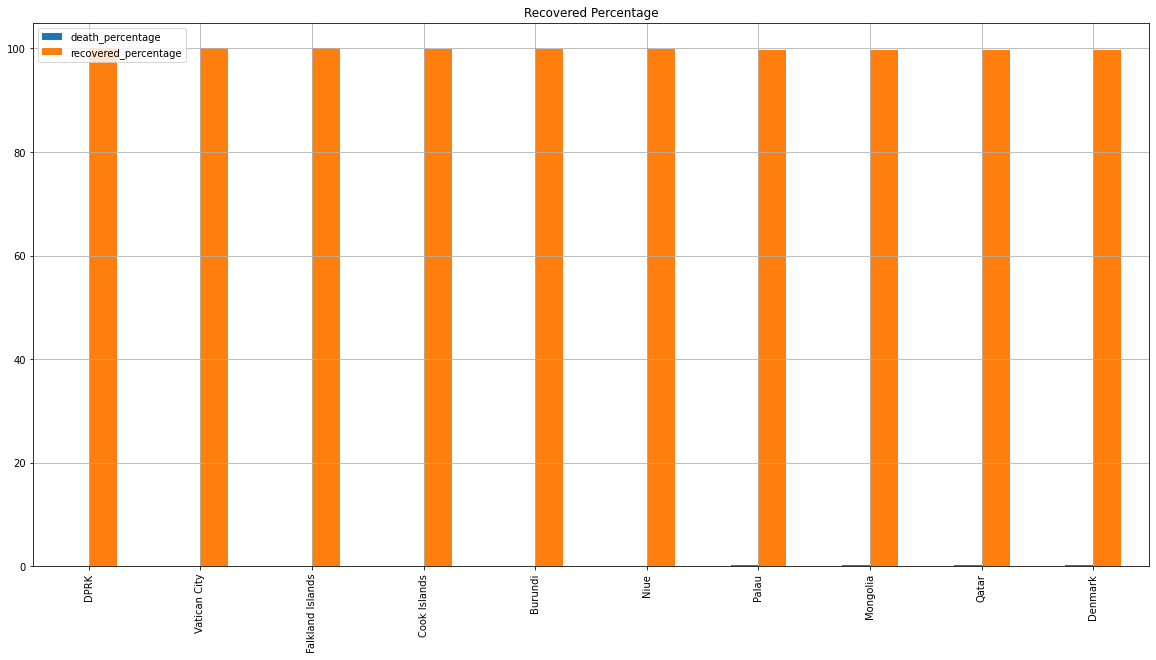

In [126]:
recovered_percent_df.plot(kind='bar', figsize=(20,10), title='Recovered Percentage', grid=True)

Từ biểu đồ này ta có thể thấy các nước này có tỉ lệ người chết rất thấp, điều này nghĩa là kế hoạch chống dịch và hệ thống y tế của các quốc gia này tốt.

**Những quốc gia nào có tỷ lệ xét nghiệm cao nhất và điều này liên quan gì đến số lượng người nhiễm bệnh và số lượng tử vong của họ?**\
Trả lời câu hỏi này sẽ cho ta biết sự ứng phó với đại dịch covid-19 của các quốc gia.

                     total_tests  total_cases  total_deaths
Afghanistan           1202868.00       209406       7896.00
Albania               1941032.00       334427       3597.00
Algeria                230861.00       271477       6881.00
Andorra                249838.00        47875        165.00
Angola                1499795.00       105277       1933.00
Anguilla                51382.00         3904         12.00
Antigua and Barbuda     18901.00         9106        146.00
Argentina            35716069.00     10044125     130463.00
Armenia               3242901.00       446819       8721.00
Aruba                  177885.00        44044        236.00


<AxesSubplot:title={'center':'Test Percentage'}>

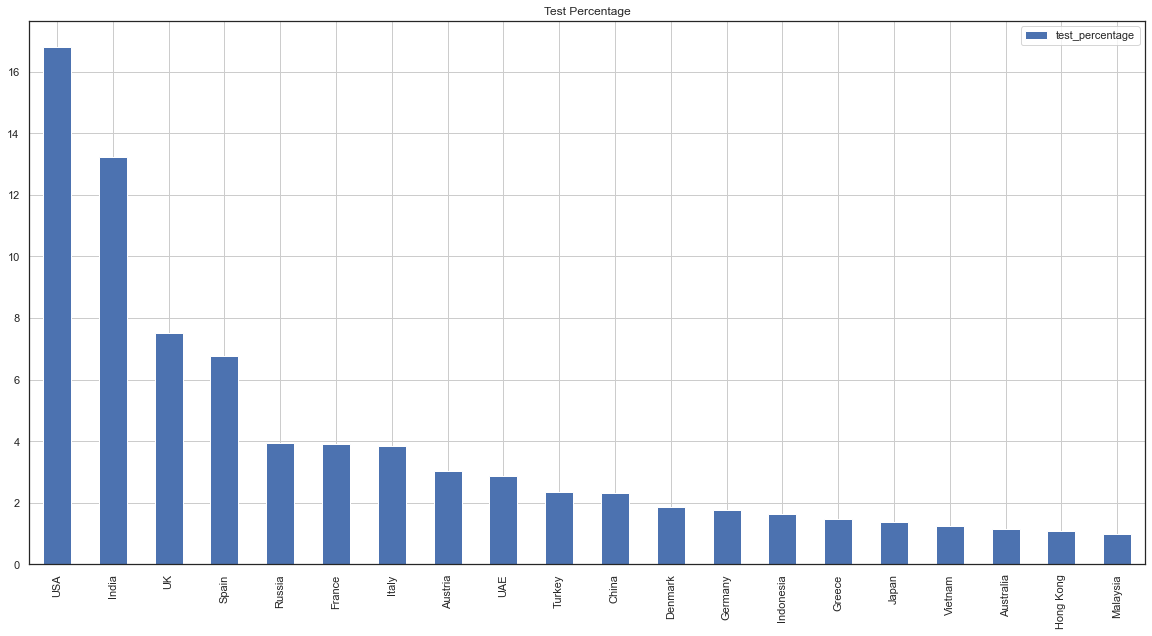

In [138]:
total_tests = []
for country in country_list:
    total_tests.append(df_dict['06-03-2023'].set_index('Country,Other')['TotalTests'][country])

total_tests_df = pd.DataFrame(total_tests, index=country_list, columns=['total_tests'])
total_tests_df = total_tests_df.sort_index()
test_percent_df = pd.concat([total_tests_df, total_cases_df, total_death_df], axis=1)
print(test_percent_df.head(10))
#compute the test percentage compared to the total test in the world
test_percent_df['test_percentage'] = test_percent_df['total_tests']/test_percent_df['total_tests'].sum()*100
test_percent_df = test_percent_df.sort_values(by=['test_percentage'], ascending=False)
#test_percent_df = test_percent_df.head(20)
#visualize the data in a bar chart
test_percent_df.head(20).plot(kind='bar', y='test_percentage', figsize=(20,10), title='Test Percentage', grid=True)

Như ta có thể thấy từ biểu đồ, đây là 20 quốc gia có tỉ lệ xét nghiệm cao nhất (trong đó có Việt Nam). \
Vậy, con số ca nhiễm và tử vong của các quốc gia này mối tương quan như thế nào?

<AxesSubplot:title={'center':'Total Cases vs Total Tests'}, xlabel='total_deaths', ylabel='total_tests'>

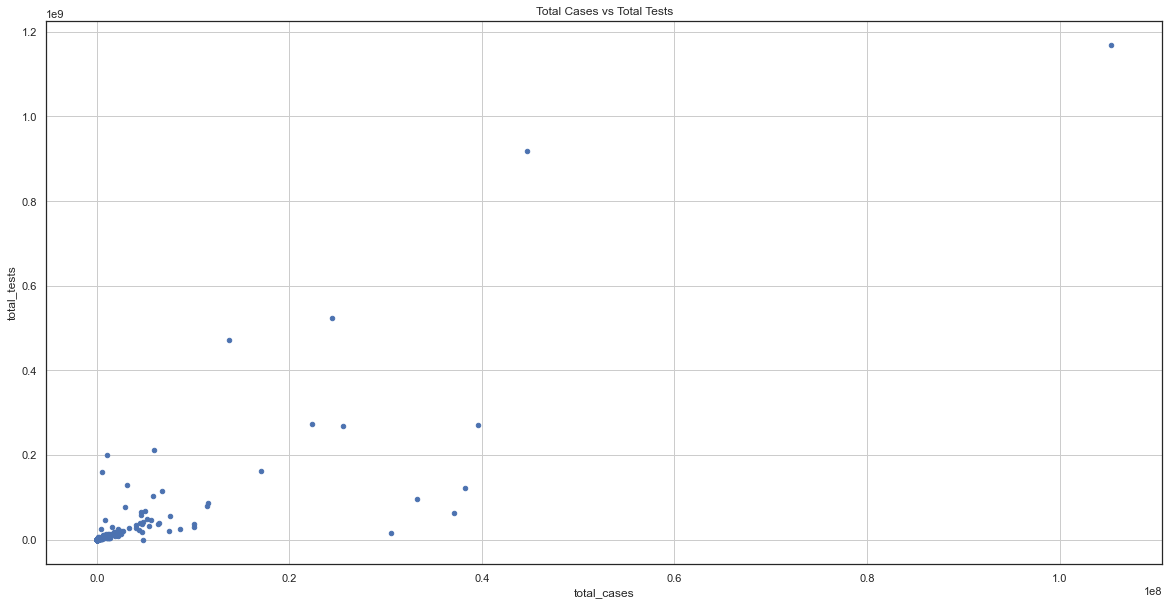

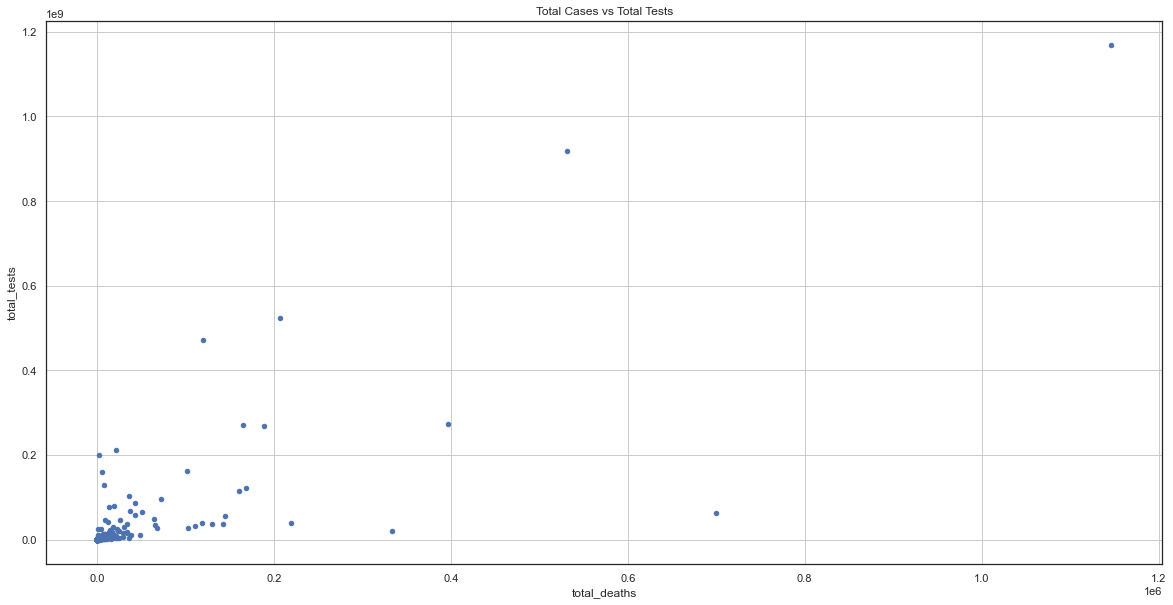

In [139]:
#visualize the total cases and total tests of each country, x-axis is total cases, y-axis is total tests
test_percent_df.plot(kind='scatter', x='total_cases', y='total_tests', figsize=(20,10), title='Total Cases vs Total Tests', grid=True)
test_percent_df.plot(kind='scatter', x='total_deaths', y='total_tests', figsize=(20,10), title='Total Cases vs Total Tests', grid=True)


Như ta có thể thấy, ở biểu đồ tương quan giữa số ca mắc và số ca test, khi số test tăng thì số ca nhiễm cũng tăng. \
Ngược lại, khi số test tăng thì số ca tử vong chỉ nằm ở mức thấp (0-0.2).  

<AxesSubplot:>

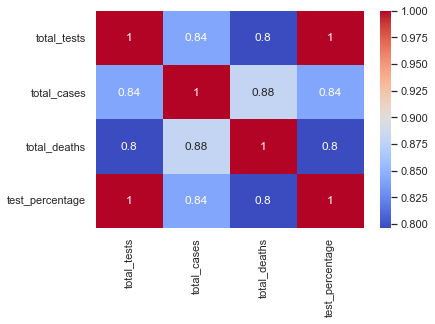

In [142]:
sns.heatmap(test_percent_df.corr(), annot=True, cmap='coolwarm')

Từ những biểu đồ trên, ta có thể kết luận rằng các quốc gia có tỉ lệ xét nghiệm cao thì có thể phát hiện được nhiều ca nhiễm hơn, nhưng số ca tử vong lại thấp hơn. Điều này có nghĩa là khi các ca mắc được phát hiện sớm, họ có thể được điều trị kịp thời và có tỉ lệ sống sót cao hơn.